##### Exogeneous variables are outside information, not historical label data.
##### Exogeneous variables are related to actual labels(dependent var), but they are not the actual labels itself!

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dateutil.parser

# mydate = [dateutil.parser.parse(x) for x in date_footfalls['visit_date']]

In [4]:
# import datetime
# date_footfalls['visit_date']=[datetime.datetime.strptime(str(i),'%Y-%m-%d  %H:%M:%S').strftime('%Y-%m-%d') for i in mydate]

In [5]:
footfall = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\VisitorData.csv", parse_dates=True, index_col=0)

In [6]:
footfall.head()

,visitors
visit_date,
2016-01-01,493
2016-01-02,3089
2016-01-03,3223
2016-01-04,2834
2016-01-05,2796


In [7]:
footfall.tail()

,visitors
visit_date,
2016-11-26,47919
2016-11-27,18235
2016-11-28,11938
2016-11-29,15605
2016-11-30,669


In [8]:
footfall.index.freq='D'

In [9]:
## Lets bring in our corresponding holiday and weekday dataset!

HolidaysWeekends = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\DateInfoforRestaurant.csv", parse_dates=True)

In [10]:
HolidaysWeekends.head()

,calendar_date,Day,Holiday
0,1/1/2016,Friday,1
1,2/1/2016,Saturday,1
2,3/1/2016,Sunday,1
3,4/1/2016,Monday,0
4,5/1/2016,Tuesday,0


In [11]:
HolidaysWeekends.tail()

,calendar_date,Day,Holiday
512,27-5-2017,Saturday,0
513,28-5-2017,Sunday,0
514,29-5-2017,Monday,0
515,30-5-2017,Tuesday,0
516,31-5-2017,Wednesday,0


In [12]:
dates = pd.date_range('2016-01-01','2017-05-31',freq='D')

In [13]:
HolidaysWeekends['visit_date'] = dates

In [14]:
HolidaysWeekends.drop('calendar_date',axis='columns', inplace=True)

In [15]:
HolidaysWeekends.head()

,Day,Holiday,visit_date
0,Friday,1,2016-01-01
1,Saturday,1,2016-01-02
2,Sunday,1,2016-01-03
3,Monday,0,2016-01-04
4,Tuesday,0,2016-01-05


In [16]:
HolidaysWeekends.set_index('visit_date', inplace=True)

In [17]:
HolidaysWeekends.head()

,Day,Holiday
visit_date,,
2016-01-01,Friday,1
2016-01-02,Saturday,1
2016-01-03,Sunday,1
2016-01-04,Monday,0
2016-01-05,Tuesday,0


In [18]:
HolidaysWeekends.head()

,Day,Holiday
visit_date,,
2016-01-01,Friday,1
2016-01-02,Saturday,1
2016-01-03,Sunday,1
2016-01-04,Monday,0
2016-01-05,Tuesday,0


In [19]:
HolidaysWeekends = HolidaysWeekends[:'2016-11-30']

In [20]:
len(HolidaysWeekends)

335

In [21]:
HolidaysWeekends.tail()

,Day,Holiday
visit_date,,
2016-11-26,Saturday,0
2016-11-27,Sunday,0
2016-11-28,Monday,0
2016-11-29,Tuesday,0
2016-11-30,Wednesday,0


In [22]:
HolidaysWeekends.index.freq = 'D'

In [23]:
HolidaysWeekends.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
               '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
               '2016-11-29', '2016-11-30'],
              dtype='datetime64[ns]', name='visit_date', length=335, freq='D')

In [24]:
# Lets column bind the two dataframes now!

In [25]:
HolidaysWeekends.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
               '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
               '2016-11-29', '2016-11-30'],
              dtype='datetime64[ns]', name='visit_date', length=335, freq='D')

In [26]:
footfall.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
               '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
               '2016-11-29', '2016-11-30'],
              dtype='datetime64[ns]', name='visit_date', length=335, freq='D')

In [27]:
df = HolidaysWeekends.merge(footfall, on="visit_date", how = 'inner')

In [28]:
len(df)

335

In [29]:
df.tail()

,Day,Holiday,visitors
visit_date,,,
2016-11-26,Saturday,0,47919
2016-11-27,Sunday,0,18235
2016-11-28,Monday,0,11938
2016-11-29,Tuesday,0,15605
2016-11-30,Wednesday,0,669


##### NOW OUR DATASET IS FINALLY READY TO PROCEED

In [30]:
df.index.freq = 'D'

In [31]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-24',
               '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
               '2016-11-29', '2016-11-30'],
              dtype='datetime64[ns]', name='visit_date', length=335, freq='D')

##### Firstly, we will do a normal SARIMA model:

### SARIMA

In [32]:
df.head()

,Day,Holiday,visitors
visit_date,,,
2016-01-01,Friday,1,493
2016-01-02,Saturday,1,3089
2016-01-03,Sunday,1,3223
2016-01-04,Monday,0,2834
2016-01-05,Tuesday,0,2796


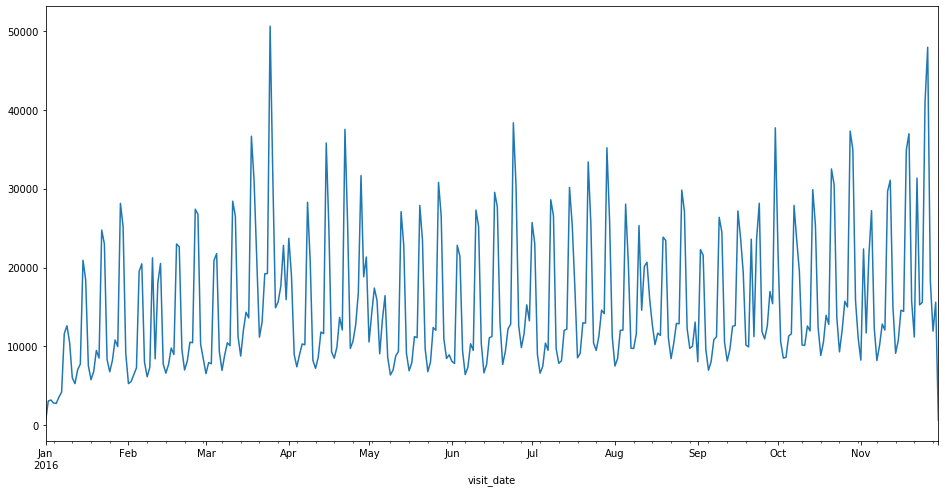

In [33]:
df['visitors'].plot(figsize=(16,8))


In [34]:
df[df['Holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-11',
               '2016-02-11', '2016-03-20', '2016-03-21', '2016-04-29',
               '2016-05-03', '2016-05-04', '2016-05-05', '2016-07-18',
               '2016-08-11', '2016-08-13', '2016-08-14', '2016-08-15',
               '2016-09-19', '2016-09-22', '2016-10-10', '2016-11-03',
               '2016-11-23'],
              dtype='datetime64[ns]', name='visit_date', freq=None)

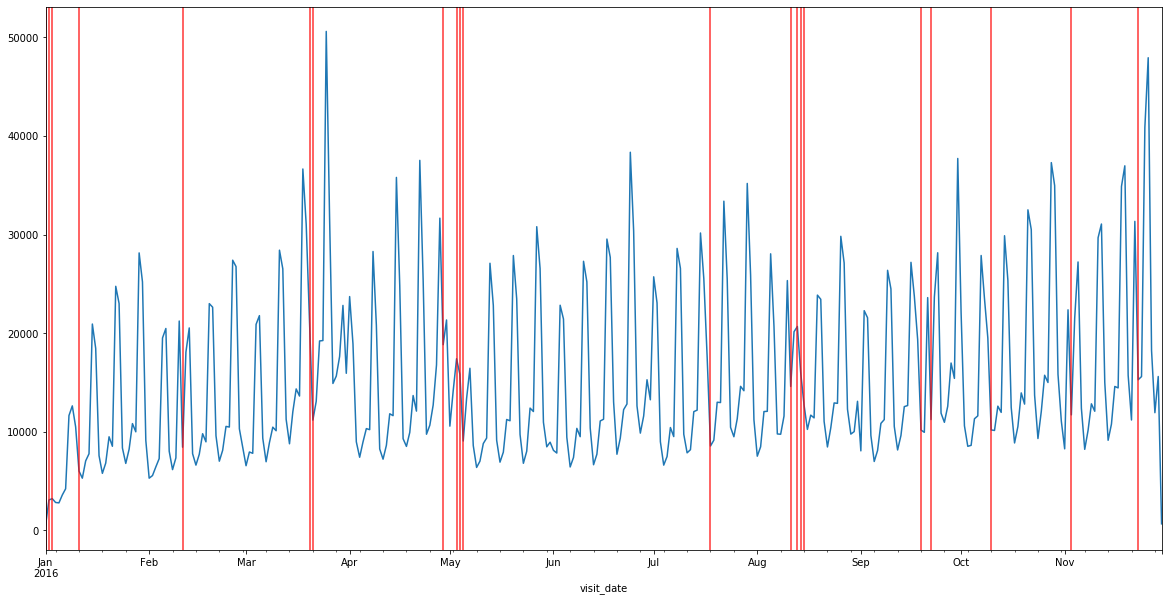

In [35]:
## Lets try and plot the holidays in the same graph:

ax = df['visitors'].plot(figsize=(20,10))

for day in df[df['Holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.8);

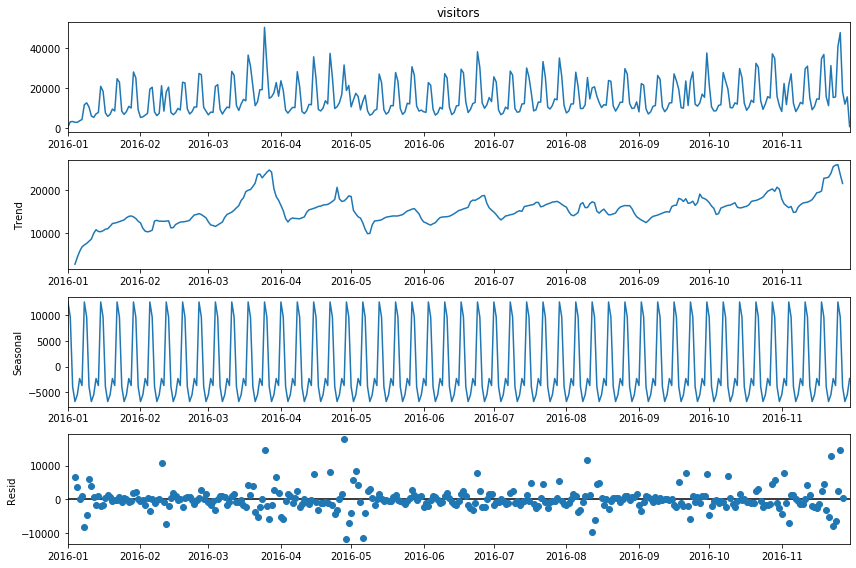

In [36]:
### Lets run a ETS decomposition:

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['visitors'])

from pylab import rcParams
rcParams['figure.figsize'] = 12,8
result.plot();

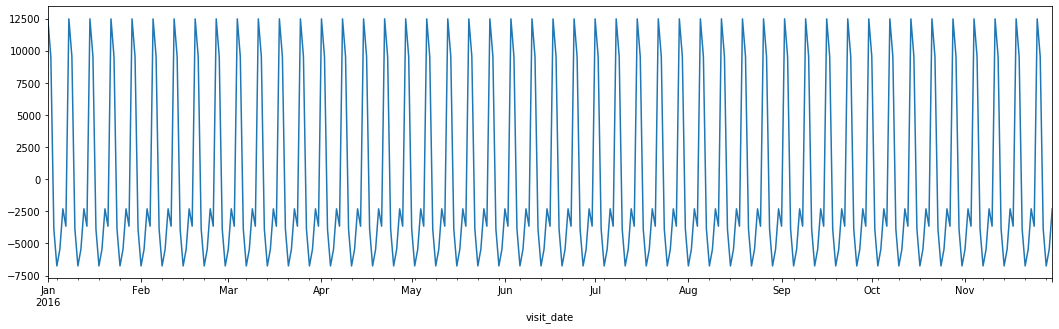

In [37]:
result.seasonal.plot(figsize=(18,5))

##### However, for now, lets start with the basic SARIMA model:

In [38]:
len(df)

335

In [39]:
from pmdarima import auto_arima

train = df[:314]
test = df[314:]

## We do train, test split to evaluate the model!

In [40]:
## While grabbing the orders, its makes sense to use the whole dataset:

stepwise_fit = auto_arima(df['visitors'], seasonal=True, m=7, trace=True)

Performing stepwise search to minimize aic


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(1, 0, 1, 7) (constant=True); AIC=6601.817, BIC=6632.306, Time=1.370 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 7) (constant=True); AIC=7061.017, BIC=7068.639, Time=0.009 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 7) (constant=True); AIC=6712.318, BIC=6727.562, Time=0.496 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (0, 1, 1)x(0, 0, 1, 7) (constant=True); AIC=6850.625, BIC=6865.870, Time=0.557 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 7) (constant=False); AIC=7059.018, BIC=7062.830, Time=0.007 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(0, 0, 1, 7) (constant=True); AIC=6762.841, BIC=6789.519, Time=0.989 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(1, 0, 0, 7) (constant=True); AIC=6639.749, BIC=6666.427, Time=0.917 seconds
Near non-invertible roots for order (2, 1, 2)(1, 0, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(2, 0, 1, 7) (constant=True); AIC=6599.920, BIC=6634.220, Time=2.085 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(2, 0, 0, 7) (constant=True); AIC=6619.035, BIC=6649.524, Time=1.910 seconds
Near non-invertible roots for order (2, 1, 2)(2, 0, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(2, 0, 2, 7) (constant=True); AIC=6632.757, BIC=6670.868, Time=2.592 seconds
Near non-invertible roots for order (2, 1, 2)(2, 0, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(1, 0, 2, 7) (constant=True); AIC=6601.368, BIC=6635.669, Time=2.387 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 2)x(2, 0, 1, 7) (constant=True); AIC=6644.985, BIC=6675.474, Time=1.831 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 1)x(2, 0, 1, 7) (constant=True); AIC=6778.418, BIC=6808.907, Time=2.319 seconds
Near non-invertible roots for order (2, 1, 1)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (3, 1, 2)x(2, 0, 1, 7) (constant=True); AIC=6609.091, BIC=6647.202, Time=2.928 seconds
Near non-invertible roots for order (3, 1, 2)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 3)x(2, 0, 1, 7) (constant=True); AIC=6759.040, BIC=6797.152, Time=2.163 seconds
Near non-invertible roots for order (2, 1, 3)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 1)x(2, 0, 1, 7) (constant=True); AIC=6798.020, BIC=6824.698, Time=1.530 seconds
Near non-invertible roots for order (1, 1, 1)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.991)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 3)x(2, 0, 1, 7) (constant=True); AIC=6790.707, BIC=6825.007, Time=1.859 seconds
Near non-invertible roots for order (1, 1, 3)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (3, 1, 1)x(2, 0, 1, 7) (constant=True); AIC=6779.339, BIC=6813.639, Time=2.553 seconds
Fit ARIMA: (3, 1, 3)x(2, 0, 1, 7) (constant=True); AIC=6765.364, BIC=6807.286, Time=2.742 seconds
Total fit time: 31.264 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [41]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  335
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -3290.960
Date:                             Wed, 26 Feb 2020   AIC                           6599.920
Time:                                     20:03:06   BIC                           6634.220
Sample:                                          0   HQIC                          6613.596
                                             - 335                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6004      3.182      0.189      0.850      -5.637       6.838
ar.L1         -0.1955      0.575     -0.340      0.734      -1.322       0.931
ar.L2          0.1746      0.317      0.552      0.581      -0.446       0.795
ma.L1         -0.3251      0.567     -0.574      0.566      -1.436       0.785
ma.L2         -0.6153      0.540     -1.140      0.254      -1.673       0.442
ar.S.L7        1.1655      0.155      7.544      0.000       0.863       1.468
ar.S.L14      -0.1744      0.144     -1.212      0.225      -0.456       0.108
ma.S.L7       -0.8449      0.124     -6.794      0.000      -1.089      -0.601
sigma2      3.209e+07   5.66e-07   5.67e+13      0.000    3.21e+07    3.21e+07
===================================================================================
Ljung-Box (Q):                       50.45   Jarque-Bera (JB):               456.73
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.41
Prob(H) (two-sided):                  0.42   Kurtosis:                         8.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.01e+29. Standard errors may be unstable.
"""

In [42]:
# auto_arima returned params as : (2,1,2)(2,0,1/0,7)

In [43]:
## Lets fit the model using these parameters:

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model = SARIMAX(train['visitors'], order=(2,1,2), seasonal_order=(2,0,1,7),
               enforce_invertibility=False)

In [45]:
res = model.fit()

C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [46]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            visitors   No. Observations:                  314
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -3060.300
Date:                             Wed, 26 Feb 2020   AIC                           6136.600
Time:                                     20:03:08   BIC                           6166.570
Sample:                                 01-01-2016   HQIC                          6148.577
                                      - 11-09-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2349      0.555     -0.423      0.672      -1.323       0.853
ar.L2          0.1452      0.292      0.497      0.619      -0.428       0.718
ma.L1         -0.2672      0.549     -0.487      0.626      -1.342       0.808
ma.L2         -0.5923      0.508     -1.165      0.244      -1.589       0.404
ar.S.L7        1.1263      0.105     10.716      0.000       0.920       1.332
ar.S.L14      -0.1290      0.103     -1.254      0.210      -0.331       0.073
ma.S.L7       -0.9120      0.076    -11.936      0.000      -1.062      -0.762
sigma2      2.715e+07   3.58e-08   7.59e+14      0.000    2.71e+07    2.71e+07
===================================================================================
Ljung-Box (Q):                       62.43   Jarque-Bera (JB):               458.69
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.48
Prob(H) (two-sided):                  0.09   Kurtosis:                         8.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.76e+30. Standard errors may be unstable.
"""

##### Why we may need to set enforce_invertability= False:

In [47]:
start = len(train)
end = len(train)+ len(test) -1
prediction = res.predict(start=start, end=end, typ='levels').rename("SARIMA only")

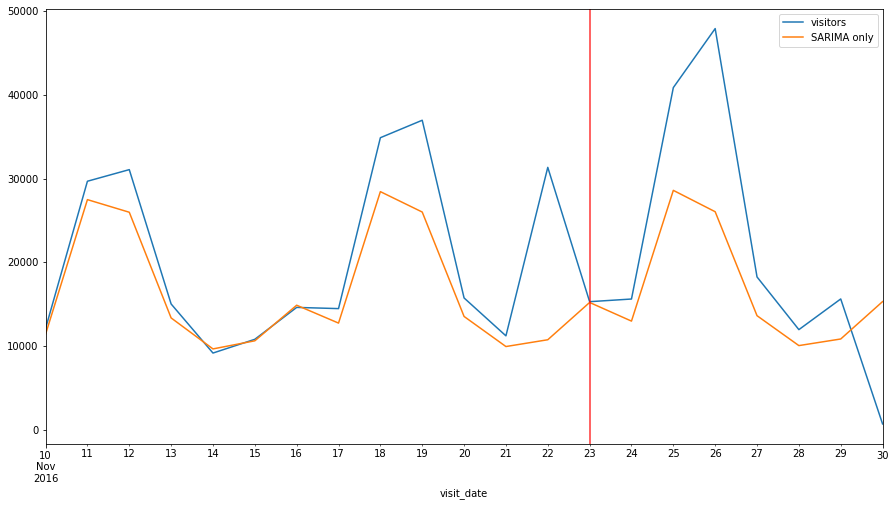

In [48]:
ax = test['visitors'].plot(legend=True, figsize=(15,8))
prediction.plot(legend=True)

for day in test[test['Holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.8);

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
rmse = np.sqrt(mean_squared_error(test['visitors'], prediction))

In [51]:
rmse

8532.649711024244

In [52]:
test['visitors'].mean()

20618.666666666668

In [53]:
prediction.mean()

16527.56939697774

In [54]:
 ## Up next, lets take exogeneous variables into account:

### SARIMAX:

In [55]:
df['Holiday']

# Observe, this produces back a series which we are familiar with!

visit_date
2016-01-01    1
2016-01-02    1
2016-01-03    1
2016-01-04    0
2016-01-05    0
             ..
2016-11-26    0
2016-11-27    0
2016-11-28    0
2016-11-29    0
2016-11-30    0
Freq: D, Name: Holiday, Length: 335, dtype: int64

In [56]:
## lets check for the parameters of SARIMAX using auto_arima:

auto_arima(df['visitors'], exogenous=df[['Holiday']] , m=7, seasonal=True, trace=True).summary()

Performing stepwise search to minimize aic


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(1, 0, 1, 7) (constant=True); AIC=6611.390, BIC=6645.691, Time=1.571 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 7) (constant=True); AIC=7052.487, BIC=7063.921, Time=0.016 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 7) (constant=True); AIC=6853.517, BIC=6872.573, Time=0.139 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (0, 1, 1)x(0, 0, 1, 7) (constant=True); AIC=6890.035, BIC=6909.091, Time=0.824 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 7) (constant=False); AIC=8658.409, BIC=8666.032, Time=0.016 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(0, 0, 1, 7) (constant=True); AIC=6761.287, BIC=6791.776, Time=1.228 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(1, 0, 0, 7) (constant=True); AIC=6647.584, BIC=6678.073, Time=1.011 seconds
Near non-invertible roots for order (2, 1, 2)(1, 0, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(2, 0, 1, 7) (constant=True); AIC=6605.490, BIC=6643.601, Time=2.482 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(2, 0, 0, 7) (constant=True); AIC=6629.240, BIC=6663.541, Time=2.152 seconds
Near non-invertible roots for order (2, 1, 2)(2, 0, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(2, 0, 2, 7) (constant=True); AIC=6637.132, BIC=6679.055, Time=2.521 seconds
Near non-invertible roots for order (2, 1, 2)(2, 0, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 2)x(1, 0, 2, 7) (constant=True); AIC=6611.450, BIC=6649.562, Time=2.645 seconds
Near non-invertible roots for order (2, 1, 2)(1, 0, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 2)x(2, 0, 1, 7) (constant=True); AIC=6642.615, BIC=6676.915, Time=1.899 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 1)x(2, 0, 1, 7) (constant=True); AIC=6774.160, BIC=6808.460, Time=2.025 seconds
Near non-invertible roots for order (2, 1, 1)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (3, 1, 2)x(2, 0, 1, 7) (constant=True); AIC=6607.543, BIC=6649.465, Time=2.995 seconds
Near non-invertible roots for order (3, 1, 2)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (2, 1, 3)x(2, 0, 1, 7) (constant=True); AIC=6757.464, BIC=6799.386, Time=2.871 seconds
Near non-invertible roots for order (2, 1, 3)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 1)x(2, 0, 1, 7) (constant=True); AIC=6790.358, BIC=6820.847, Time=2.330 seconds
Near non-invertible roots for order (1, 1, 1)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 1, 3)x(2, 0, 1, 7) (constant=True); AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA: (3, 1, 1)x(2, 0, 1, 7) (constant=True); AIC=6772.946, BIC=6811.057, Time=2.510 seconds
Near non-invertible roots for order (3, 1, 1)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (3, 1, 3)x(2, 0, 1, 7) (constant=True); AIC=6766.537, BIC=6812.271, Time=2.733 seconds
Near non-invertible roots for order (3, 1, 3)(2, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 34.321 seconds


C:\Users\shaleens\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  335
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -3292.745
Date:                             Wed, 26 Feb 2020   AIC                           6605.490
Time:                                     20:03:43   BIC                           6643.601
Sample:                                 01-01-2016   HQIC                          6620.685
                                      - 11-30-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3969      3.408      0.116      0.907      -6.282       7.076
Holiday    -5789.9793   1325.999     -4.367      0.000   -8388.889   -3191.070
ar.L1         -0.3500      0.210     -1.669      0.095      -0.761       0.061
ar.L2          0.2646      0.160      1.657      0.098      -0.048       0.578
ma.L1         -0.0944      0.179     -0.528      0.597      -0.445       0.256
ma.L2         -0.8190      0.168     -4.875      0.000      -1.148      -0.490
ar.S.L7        1.1246      0.147      7.671      0.000       0.837       1.412
ar.S.L14      -0.1320      0.138     -0.953      0.341      -0.403       0.139
ma.S.L7       -0.8592      0.113     -7.625      0.000      -1.080      -0.638
sigma2      3.232e+07      0.108      3e+08      0.000    3.23e+07    3.23e+07
===================================================================================
Ljung-Box (Q):                       46.47   Jarque-Bera (JB):               290.05
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.64
Prob(H) (two-sided):                  0.19   Kurtosis:                         7.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.27e+24. Standard errors may be unstable.
"""

In [57]:
# Train our SARIMAX:

model = SARIMAX(train['visitors'], exog=train[['Holiday']], 
                order=(2,1,2), seasonal_order=(2,0,1,7),
               enforce_invertibility=False)

In [58]:
res = model.fit()

In [59]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            visitors   No. Observations:                  314
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -3063.265
Date:                             Wed, 26 Feb 2020   AIC                           6144.530
Time:                                     20:03:45   BIC                           6178.246
Sample:                                 01-01-2016   HQIC                          6158.004
                                      - 11-09-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Holiday    -5616.1100   1196.564     -4.694      0.000   -7961.332   -3270.888
ar.L1         -0.2789      0.237     -1.178      0.239      -0.743       0.185
ar.L2          0.2338      0.180      1.298      0.194      -0.119       0.587
ma.L1         -0.1490      0.221     -0.675      0.500      -0.582       0.284
ma.L2         -0.7607      0.214     -3.562      0.000      -1.179      -0.342
ar.S.L7        1.1285      0.110     10.290      0.000       0.914       1.344
ar.S.L14      -0.1310      0.107     -1.220      0.223      -0.342       0.079
ma.S.L7       -0.9209      0.080    -11.580      0.000      -1.077      -0.765
sigma2      2.772e+07      0.023    1.2e+09      0.000    2.77e+07    2.77e+07
===================================================================================
Ljung-Box (Q):                       52.84   Jarque-Bera (JB):               277.85
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.73
Prob(H) (two-sided):                  0.33   Kurtosis:                         7.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.32e+25. Standard errors may be unstable.
"""

In [60]:
start = len(train)
end = len(train) + len(test) -1
predictions = res.predict(start=start, end=end, exog=test[['Holiday']]).rename("SARIMAX with Exog")

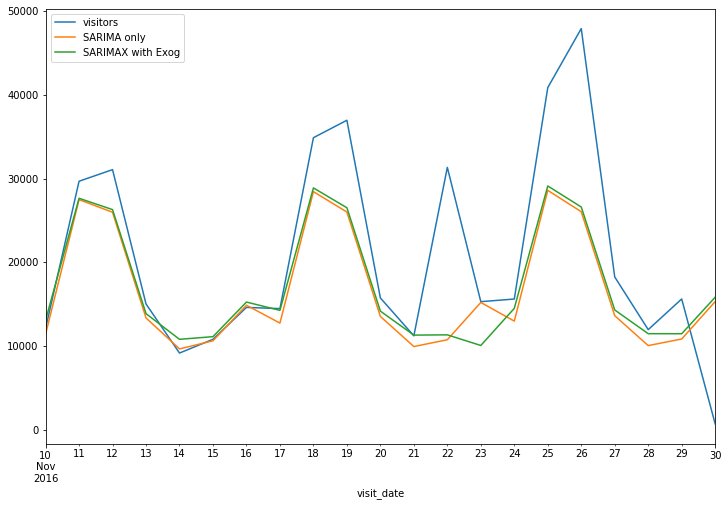

In [61]:
test['visitors'].plot(legend=True)
prediction.plot(legend=True)
predictions.plot(figsize=(12,8), legend=True)


In [72]:
test.tail()

,Day,Holiday,visitors
visit_date,,,
2016-11-26,Saturday,0,47919
2016-11-27,Sunday,0,18235
2016-11-28,Monday,0,11938
2016-11-29,Tuesday,0,15605
2016-11-30,Wednesday,0,669


In [73]:
predictions

2016-11-10    13070.889206
2016-11-11    27637.219294
2016-11-12    26282.560002
2016-11-13    13849.215224
2016-11-14    10781.489944
2016-11-15    11099.162367
2016-11-16    15233.119344
2016-11-17    14241.365418
2016-11-18    28875.848248
2016-11-19    26504.201616
2016-11-20    14149.006397
2016-11-21    11284.295996
2016-11-22    11314.641477
2016-11-23    10044.508087
2016-11-24    14483.431709
2016-11-25    29106.023837
2016-11-26    26596.357402
2016-11-27    14288.508801
2016-11-28    11453.165549
2016-11-29    11448.526529
2016-11-30    15809.764604
Freq: D, Name: SARIMAX with Exog, dtype: float64

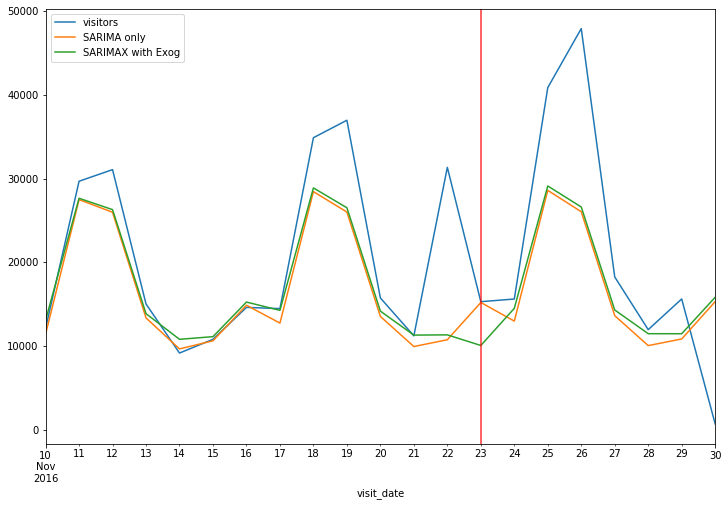

In [62]:
ax = test['visitors'].plot(figsize=(12,8),legend=True)
prediction.plot(legend=True)
predictions.plot(legend=True)


for day in test[test['Holiday']==1].index:
    ax.axvline(x=day, color='red', alpha=0.8);

In [63]:
rmse = np.sqrt(mean_squared_error(test['visitors'], predictions))

In [64]:
rmse

8352.418483669726

In [65]:
## Here, our exogeenous variable somehow increased our error a bit.
## Its because the data is dummy data, but if your data quality is good, it will surely help reduce the error!

##### Point of decision:

At this point, you should decide by now that you have to with the SARIMA model or the SARIMAX model

I am going with the SARIMA model, coz with this random dataset i got lesser rmse with SARIMA(i.e. using SARIMAX without exog parameter) than SARIMAX.

In [66]:
model = SARIMAX(df['visitors'], order=(2,1,2), seasonal_order=(2,0,1,7),
               enforce_invertibility=False)

In [67]:
res = model.fit()

In [68]:
pred = res.predict(start=len(df), end = len(df)+11).rename("FINAL SARIMA forecast") #exog if exogeneous variable present!

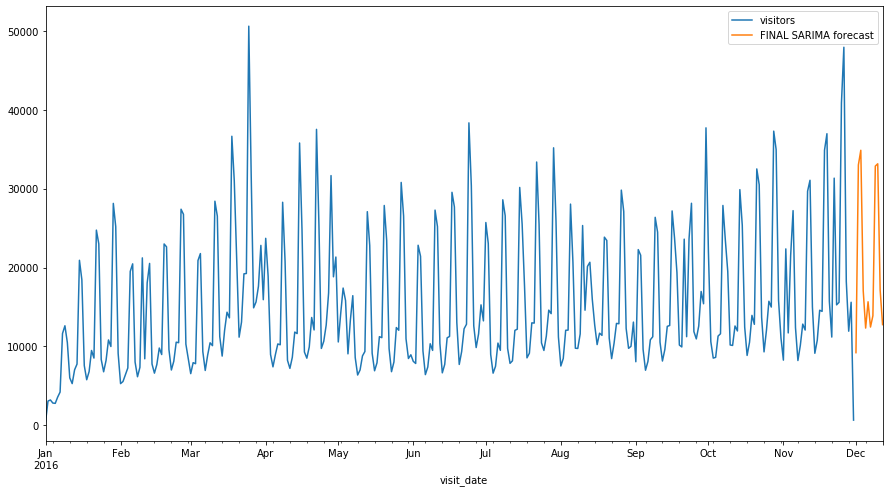

In [69]:
df['visitors'].plot(figsize=(15,8), legend = True)
pred.plot(legend= True)

In [70]:
# If we had exogeneouss varible, we had plotted it on plot as well to make inferences.!